# Backtracking

## Configuraciones del entorno

In [1]:
!pip install numpy
!pip install matplotlib

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

## Programando

### Inciso 1

Program the steepest descent algorithms using the **back-tracking** for the following function of two variables

$$
f(x) = 100(x_2 − {x_1}^2)^2 + (1 − x_1)^2
$$

Para implementar el algoritmo de gradiente descendiente, definimos el gradiente de $f(x)$.

$$
\nabla f = 2
\begin{bmatrix}
200 x_1^3 - 200 x_1 x_2 + x_1 - 1 \\
100(x_2 - x_1^2)
\end{bmatrix}
$$

Definimos funciones que nos faciliten calcular los valores de función $f(x_k)$, los gradientes $\nabla f$ y las direcciones $p_k$.

In [3]:
def f_x(point):
    res = 100 * np.power(point[1] - np.power(point[0], 2) ,2) + np.power(1 - point[0], 2)
    return res

def gradient(point):
    df_x1 = 200.0 * np.power(point[0], 3) - 200.0 * np.multiply(point[0], point[1]) + point[0] - 1.0
    df_x2 = 100.0 * (point[1] - point[0]**2)
    return np.multiply(2.0, np.array([df_x1, df_x2]))

def p_direction(point):
    return np.multiply(gradient(point), -1)

Implementamos el back-tracking. La condición que queremos cumplir se define como:

$$
\begin{gather}
f(x_k + \alpha_k p_k) \leqslant f(x_k) + c \alpha (\nabla f_k)^T p_k \\
c \in (0, 1)
\end{gather}
$$

Mientras la condición no se cumple, se sigue iterando y actualizando el $\alpha$ de la siguiente forma:

$$
\rho \in (0, 1), \alpha_k = \rho \alpha
$$

In [4]:
def backtracking(point, initial_alpha, rho_const, c_const):
    alpha = initial_alpha
    xk = point
    history = []
    
    p = p_direction(xk)
    while f_x(xk + np.multiply(alpha, p)) > (f_x(xk) + c_const * alpha * np.dot(np.transpose(gradient(xk)), p)):
        history.append(alpha)
        alpha = rho_const * alpha

    return [np.array(history), alpha]

Incorporamos el algoritmo de gradiente descendiente usando el ajuste proporcionado por *back-tracking*. Para este caso, se eligen los siguiente hiper-parámetros:

$$
\begin{gather}
\rho = 0.9 \\
c = 0.9
\end{gather}
$$

In [5]:
def steepest_descent(iterations, step_size, initial_point, error_max):
    values = []
    gradients = []
    times = []
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.dot(backtracking(xk, step_size, 0.9, 0.9)[1], gradient(xk)))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff_values = np.linalg.norm(values[i] - values[i - 1])
            diff_mov = np.linalg.norm(grad_xk)
            if diff_values <= error_max or diff_mov <= error_max:
                break
    
    return [np.array(gradients), np.array(times), np.array(values)]

#### Punto 1.1: Calcular el número de iteraciones

Definimos los puntos que vamos a utilizar y el error máximo que toleraremos.

$$
\begin{gather}
x_a  = \begin{bmatrix} 1.2 \\ 1.2 \end{bmatrix} \\
x_b  = \begin{bmatrix} -1.2 \\ 1 \end{bmatrix} \\
e_{max} = 1e^{-5}
\end{gather}
$$

In [6]:
point_xA = np.array([1.2, 1.2])
point_xB = np.array([-1.2, 1])
e_max = 1e-5
alpha_manual = 0.1
iterations = 1000

Aplicamos el algoritmo para el punto $x_a$.

In [7]:
results_xA = steepest_descent(iterations, alpha_manual, point_xA, e_max)

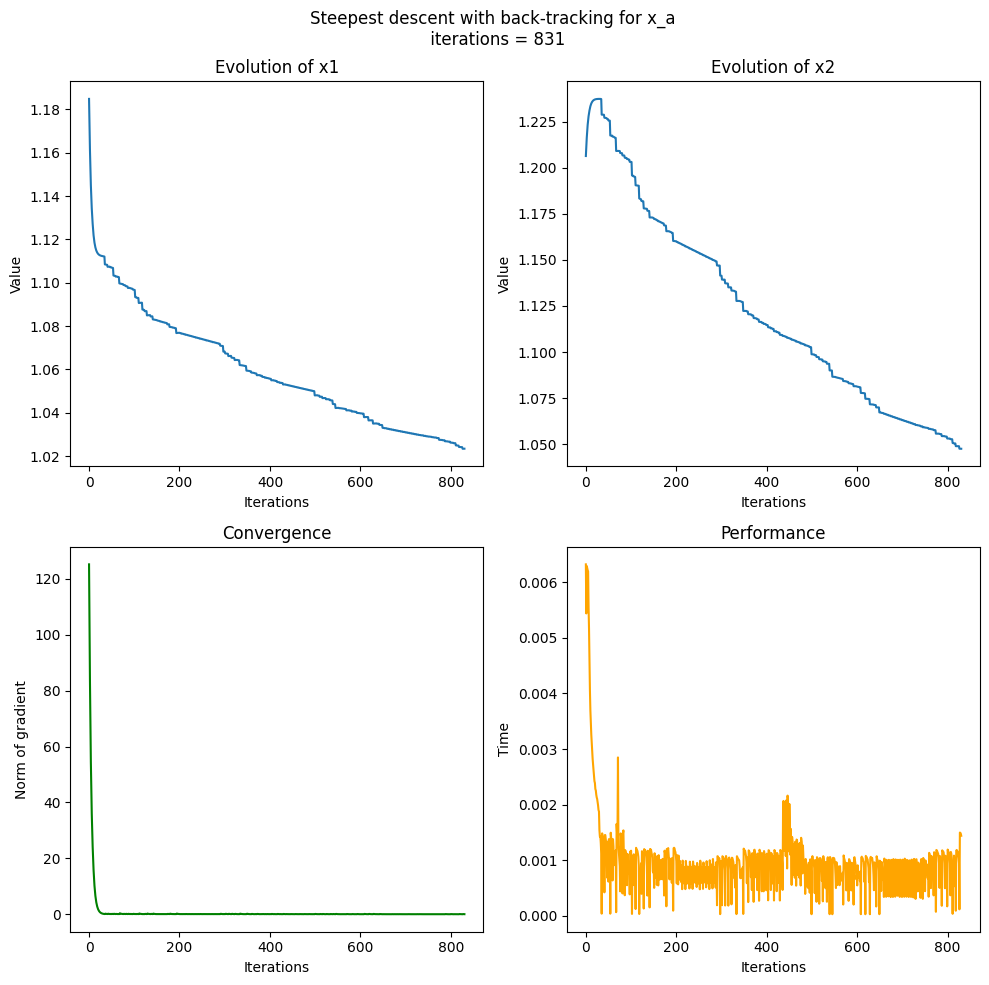

In [8]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(results_xA[2][:, 0])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x1')
plt.subplot(2, 2, 2)
plt.plot(results_xA[2][:, 1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x2')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_xA[0], axis=1), color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(2, 2, 4)
plt.plot(results_xA[1], color = 'orange')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.suptitle(f'Steepest descent with back-tracking for x_a \n iterations = {results_xA[2].shape[0]}')
plt.tight_layout()
plt.show()

Aplicamos el algoritmo para el punto $x_b$.

In [9]:
results_xB = steepest_descent(iterations, alpha_manual, point_xB, e_max)

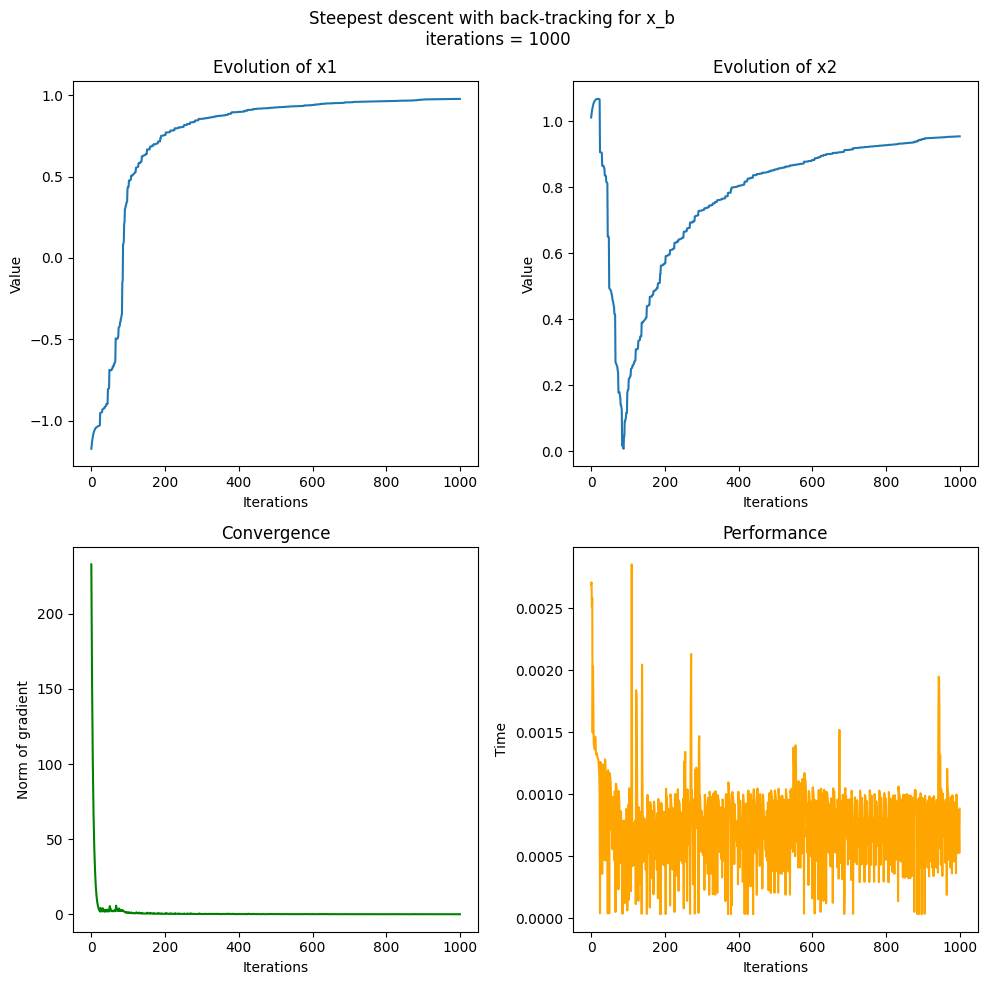

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(results_xB[2][:, 0])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x1')
plt.subplot(2, 2, 2)
plt.plot(results_xB[2][:, 1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x2')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_xB[0], axis=1), color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(2, 2, 4)
plt.plot(results_xB[1], color = 'orange')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.suptitle(f'Steepest descent with back-tracking for x_b \n iterations = {results_xB[2].shape[0]}')
plt.tight_layout()
plt.show()

### Inciso 2

Implementamos un algoritmo que satisfaga las **condiciones de Wolfe**. Esto adiciona una condición adicional al *back-tracking* actual, entonces hacemos otra definición. Las condiciones quedarían:

$$
\begin{gather}
f(x_k + \alpha_k p_k) \leqslant f(x_k) + c_1 \alpha_k (\nabla f_k)^T p_k \\
(\nabla f(x_k + \alpha_k p_k))^T p_k \geqslant c_2 (\nabla f_k)^T p_k \\
0 \textless c_1 \textless c_2 \textless 1 
\end{gather}
$$

In [11]:
def wolfe_cond1(xk, alpha_k, p_k, c1):
    return f_x(xk + np.multiply(alpha_k, p_k)) > (f_x(xk) + c1 * alpha_k * np.dot(np.transpose(gradient(xk)), p_k))

def wolfe_cond2(xk, alpha_k, p_k, c2):
    return np.dot(np.transpose(gradient(xk + np.multiply(alpha_k, p_k))), p_k) < (np.dot(np.multiply(np.transpose(gradient(xk)), c2), p_k))

def backtracking_wolfe(point, initial_alpha, rho_const, c1_const, c2_const):
    alpha = initial_alpha
    xk = point
    history = []
    
    p = p_direction(xk)
    while wolfe_cond1(xk, alpha, p, c1_const) or wolfe_cond2(xk, alpha, p, c2_const):
        history.append(alpha)
        alpha = rho_const * alpha

    return [np.array(history), alpha]

In [12]:
backtracking_wolfe(point_xA, alpha_manual, 0.9, 0.5, 0.9)

[array([0.1       , 0.09      , 0.081     , 0.0729    , 0.06561   ,
        0.059049  , 0.0531441 , 0.04782969, 0.04304672, 0.03874205,
        0.03486784, 0.03138106, 0.02824295, 0.02541866, 0.02287679,
        0.02058911, 0.0185302 , 0.01667718, 0.01500946, 0.01350852,
        0.01215767, 0.0109419 , 0.00984771, 0.00886294, 0.00797664,
        0.00717898, 0.00646108, 0.00581497, 0.00523348, 0.00471013,
        0.00423912, 0.0038152 , 0.00343368, 0.00309032, 0.00278128,
        0.00250316, 0.00225284, 0.00202756, 0.0018248 , 0.00164232,
        0.00147809, 0.00133028, 0.00119725, 0.00107753, 0.00096977,
        0.0008728 , 0.00078552]),
 0.0007069650490151057]

In [13]:
def steepest_descent_wolfe(iterations, step_size, initial_point, error_max):
    values = []
    gradients = []
    times = []
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.dot(backtracking_wolfe(xk, step_size, 0.9, 0.5, 0.9)[1], gradient(xk)))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff_values = np.linalg.norm(values[i] - values[i - 1])
            diff_mov = np.linalg.norm(grad_xk)
            if diff_values <= error_max or diff_mov <= error_max:
                break
    
    return [np.array(gradients), np.array(times), np.array(values)]

In [14]:
results_wolfe_xA = steepest_descent_wolfe(20, alpha_manual, point_xA, e_max)

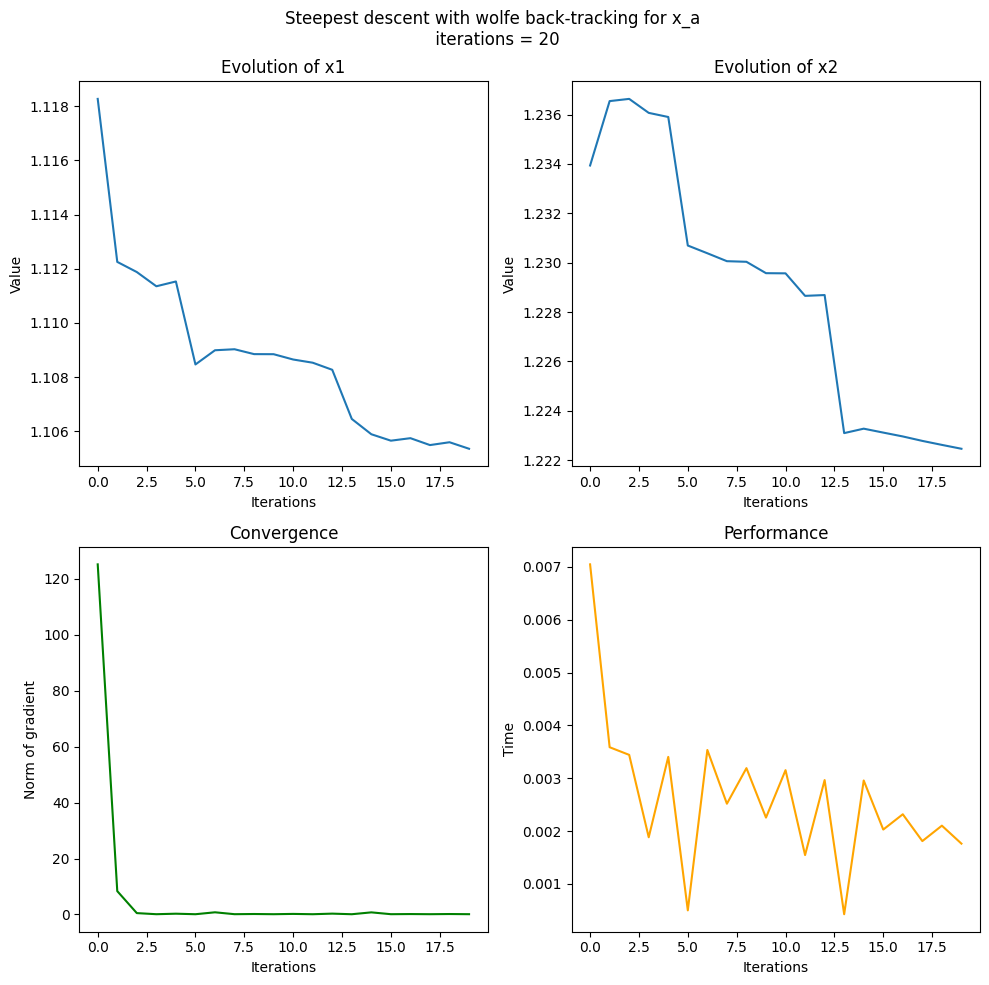

In [15]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(results_wolfe_xA[2][:, 0])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x1')
plt.subplot(2, 2, 2)
plt.plot(results_wolfe_xA[2][:, 1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x2')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_wolfe_xA[0], axis=1), color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(2, 2, 4)
plt.plot(results_wolfe_xA[1], color = 'orange')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.suptitle(f'Steepest descent with wolfe back-tracking for x_a \n iterations = {results_wolfe_xA[2].shape[0]}')
plt.tight_layout()
plt.show()

Aplicamos el algoritmo para el punto $x_b$.

In [ ]:
results_wolfe_xB = steepest_descent_wolfe(20, alpha_manual, point_xB, e_max)

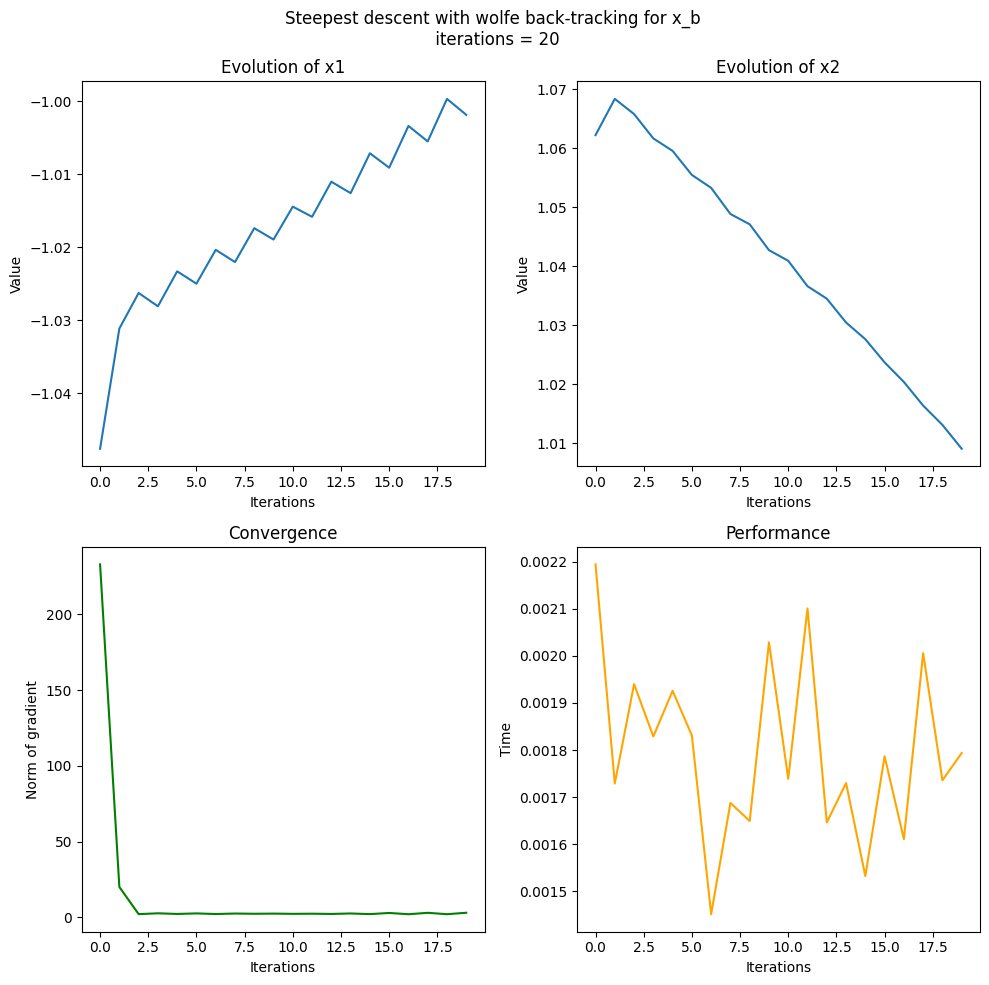

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(results_wolfe_xB[2][:, 0])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x1')
plt.subplot(2, 2, 2)
plt.plot(results_wolfe_xB[2][:, 1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x2')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_wolfe_xB[0], axis=1), color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(2, 2, 4)
plt.plot(results_wolfe_xB[1], color = 'orange')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.suptitle(f'Steepest descent with wolfe back-tracking for x_b \n iterations = {results_wolfe_xB[2].shape[0]}')
plt.tight_layout()
plt.show()

### Inciso 3

Implementamos un algoritmo que satisface las **condiciones de Goldstein**. Las condiciones quedarían:

$$
f(x_k) + (1 - c)\alpha_k \nabla f_k^T p_k \leqslant f(x_k + \alpha_k p_k) \leqslant f(x_k) + c \alpha_k \nabla f_k^T p_k
$$

In [19]:
def goldstein_cond1(xk, alpha_k, p_k, c):
    return f_x(xk) + (1 - c) * np.multiply(alpha_k, np.dot(gradient(xk), p_k)) <= f_x(xk + np.multiply(alpha_k, p_k))

def goldstein_cond2(xk, alpha_k, p_k, c):
    return f_x(xk + np.multiply(alpha_k, p_k)) <= (f_x(xk) + c * alpha_k * np.dot(gradient(xk), p_k))

def backtracking_goldstein(point, initial_alpha, rho_const, c):
    if c < 0 or c > 0.5:
        print(f'The constant c = {c} is out of recommended range')
        
    alpha = initial_alpha
    xk = point
    history = []
    
    p = p_direction(xk)
    while not(goldstein_cond1(xk, alpha, p, c)) or not(goldstein_cond2(xk, alpha, p, c)):
        history.append(alpha)
        alpha = rho_const * alpha

    return [np.array(history), alpha]

Implementamos el gradiente descendiente con las condiciones de Goldstein.

In [25]:
def steepest_descent_goldstein(iterations, step_size, initial_point, error_max):
    values = []
    gradients = []
    times = []
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.dot(backtracking_goldstein(xk, step_size, 0.9, 0.1)[1], gradient(xk)))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff_values = np.linalg.norm(values[i] - values[i - 1])
            diff_mov = np.linalg.norm(grad_xk)
            if diff_values <= error_max or diff_mov <= error_max:
                break
    
    return [np.array(gradients), np.array(times), np.array(values)]

Aplicamos el algoritmo para el punto $x_b$.

In [28]:
results_goldstein_xA = steepest_descent_goldstein(50, alpha_manual, point_xA, e_max)

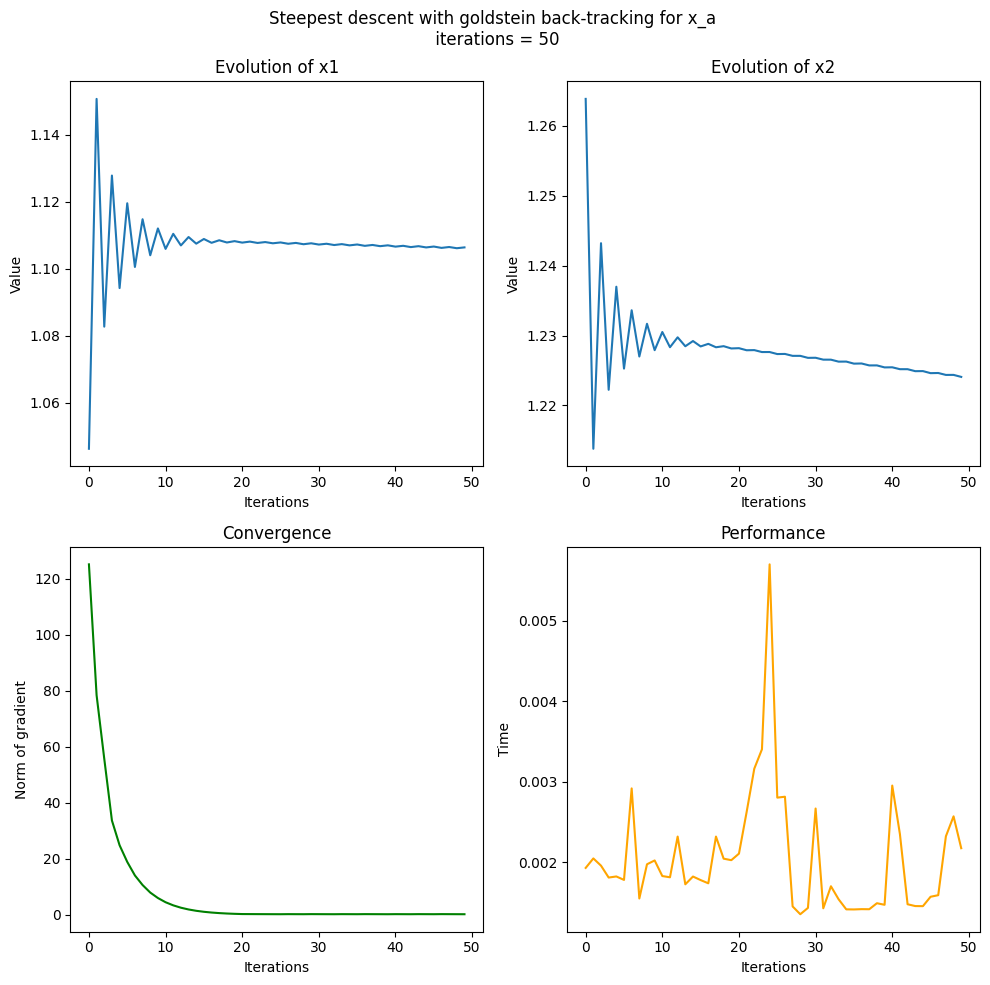

In [29]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(results_goldstein_xA[2][:, 0])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x1')
plt.subplot(2, 2, 2)
plt.plot(results_goldstein_xA[2][:, 1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Evolution of x2')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_goldstein_xA[0], axis=1), color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Norm of gradient')
plt.title('Convergence')
plt.subplot(2, 2, 4)
plt.plot(results_goldstein_xA[1], color = 'orange')
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.title('Performance')

plt.suptitle(f'Steepest descent with goldstein back-tracking for x_a \n iterations = {results_goldstein_xA[2].shape[0]}')
plt.tight_layout()
plt.show()